# 과제#1. car seat 매출 예측

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 비즈니스 상황
    * 고객사는 국내(미국)와 국외에서 카시트를 판매하는 회사입니다.
    * 최근 경쟁사의 공격적인 마케팅으로 매출이 감소하고 있습니다.
    * 이를 해결하고자 여러분들에게 예측 모델링을 의뢰하였습니다.



|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매수(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|
|	Education 	|	 평균학력수준(범주 : 11~17)	|	feature	|
|	Income 	|	 매장 지역 주민의 평균 소득(1000달러)|	feature	|

## 0.환경준비

### 0.1 Import

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    

### 0.2 Data Loading

In [23]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_train.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,3.72,139.0,111.0,5,310,132,Bad,62,13,Yes,Yes
1,2.93,143.0,21.0,5,81,160,Medium,67,12,No,Yes
2,4.53,114.0,NaN,0,97,125,Medium,29,12,Yes,No
3,8.47,119.0,88.0,10,170,101,Medium,61,13,Yes,Yes
4,11.85,136.0,81.0,15,425,120,Good,67,10,Yes,Yes


In [24]:
data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
295,7.50,140.0,29.0,0,105,91,Bad,43,16,Yes,No
296,4.42,121.0,90.0,0,150,108,Bad,75,16,Yes,No
297,9.44,131.0,47.0,7,90,118,Medium,47,12,Yes,Yes
298,5.87,131.0,73.0,13,455,132,Medium,62,17,Yes,Yes
299,10.10,135.0,63.0,15,213,134,Medium,32,10,Yes,Yes


## 1.데이터 탐색

## 2.데이터 전처리 

In [25]:
target = 'Sales'

### 2.1 데이터를 feature와 , target으로 분할

In [26]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### 2.2 NaN에 대한 조치

In [27]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,300.000000,287.000000,288.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,7.441867,125.344948,68.673611,6.600000,266.950000,115.930000,52.963333,13.906667
std,2.928141,14.551674,28.558597,6.569413,148.112339,22.149653,16.377098,2.601380
min,0.000000,86.000000,21.000000,0.000000,12.000000,49.000000,25.000000,10.000000
25%,5.357500,116.000000,42.000000,0.000000,136.250000,101.000000,39.000000,12.000000
50%,7.260000,125.000000,69.000000,5.000000,278.000000,117.000000,54.000000,14.000000
75%,9.352500,135.000000,93.000000,11.000000,400.000000,131.000000,65.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [28]:
data.isnull().sum()

Sales           0
CompPrice      13
Income         12
Advertising     0
Population      0
Price           0
ShelveLoc       0
Age             0
Education       0
Urban           0
US              0
dtype: int64

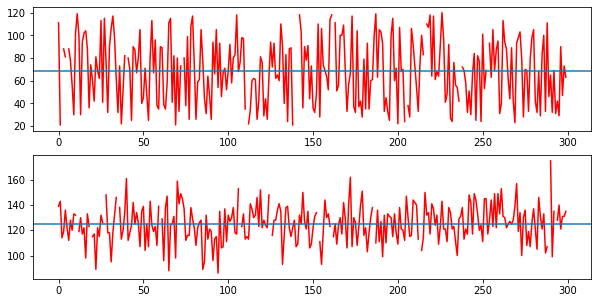

In [9]:
plt.figure(figsize=(10,5))
mean_in = data['Income'].mean()
mean_cp = data['CompPrice'].mean()

plt.subplot(2,1,1)
plt.plot(data['Income'],'r')
plt.axhline(mean_in)

plt.subplot(2,1,2)
plt.plot(data['CompPrice'],'r')
plt.axhline(mean_cp)

* 가변수화 진행 한 후 KNN Imputer로 채울 예정이다.

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [29]:
cols = ['ShelveLoc', 'Urban', 'US','Education']

In [30]:
data = pd.get_dummies(data, columns =cols, drop_first = True)

In [31]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
0,3.72,139.0,111.0,5,310,132,62,0,0,1,1,0,0,1,0,0,0,0,0
1,2.93,143.0,21.0,5,81,160,67,0,1,0,1,0,1,0,0,0,0,0,0
2,4.53,114.0,NaN,0,97,125,29,0,1,1,0,0,1,0,0,0,0,0,0
3,8.47,119.0,88.0,10,170,101,61,0,1,1,1,0,0,1,0,0,0,0,0
4,11.85,136.0,81.0,15,425,120,67,1,0,1,1,0,0,0,0,0,0,0,0


In [33]:
from sklearn.impute import KNNImputer

In [34]:
imputer = KNNImputer(n_neighbors=4)
imputed = imputer.fit_transform(data)

data = pd.DataFrame(imputed, columns=data.columns)
data.isna().sum()

Sales               0
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_Yes           0
US_Yes              0
Education_11        0
Education_12        0
Education_13        0
Education_14        0
Education_15        0
Education_16        0
Education_17        0
Education_18        0
dtype: int64

### 2.4 추가변수 도출

In [35]:
x['Price_diff'] = x['CompPrice'] - x['Price']

* 경쟁사와 가격의 차 변수 만들어 사용

### 2.5 데이터 분할
* train 데이터를 train : val 로 분할하시오.
* train set의 적절한 사이즈를 결정하시오.

In [36]:
target = 'Sales'

In [37]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_val , y_train, y_val = train_test_split(x,y,train_size=0.8,random_state=2022)

In [41]:
x_train2 = x_train.loc[:,['CompPrice','Price','Income']]

### 2.6 스케일링 

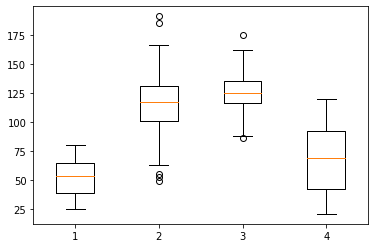

In [46]:
plt.boxplot([x['Age'], x['Price'], x['CompPrice'], x['Income']])
plt.show()

In [47]:
from sklearn.preprocessing import MinMaxScaler
col_x = list(x)
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

## 3.모델링1 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

### 3.2 모델링

#### (1) Linear Regression 모델링

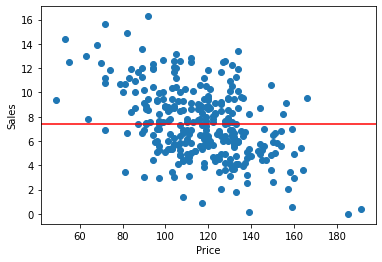

In [49]:
mean_sa = data['Sales'].mean()
plt.scatter(x='Price', y='Sales', data=data)
plt.axhline(mean_sa, color='r')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()

In [50]:
#선언
model1 = LinearRegression()

In [51]:
#학습하기
model1.fit(x_train,y_train)

LinearRegression()

In [52]:
#회귀계수확인
print(list(x))
print(model1.coef_)
print(model1.intercept_)

['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes', 'Education_11', 'Education_12', 'Education_13', 'Education_14', 'Education_15', 'Education_16', 'Education_17', 'Education_18']
[ 8.89736131e-02  1.20605458e-02  1.27878915e-01  6.85189906e-05
 -1.00598733e-01 -5.08462247e-02  5.01910335e+00  1.97707371e+00
  1.60090474e-01 -1.70269188e-01 -6.55766365e-01 -3.28384651e-01
 -5.09945632e-01 -5.11772058e-01 -1.29607221e-01 -2.89525880e-01
 -4.87284480e-01 -6.03886163e-01]
7.255371096458005


In [53]:
#예측하기
y_pred = model1.predict(x_val)

In [54]:
print('MAE:',mean_absolute_error(y_val, y_pred))
print('R2:',r2_score(y_val, y_pred))

MAE: 1.0220312666215996
R2: 0.8292861899273919


#### (2) Decision Tree 모델링

In [55]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18
0,3.72,139.0,111.0,5.0,310.0,132.0,62.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.93,143.0,21.0,5.0,81.0,160.0,67.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.53,114.0,58.0,0.0,97.0,125.0,29.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.47,119.0,88.0,10.0,170.0,101.0,61.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,11.85,136.0,81.0,15.0,425.0,120.0,67.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
model2 = DecisionTreeRegressor(max_depth =5,random_state = 2022)

In [66]:
param = {'max_depth': range(1, 21)}

In [67]:
model2 = RandomizedSearchCV(model2,      # 기본 모델 이름
                           param,         # 앞에서 선언한 튜닝용 파라미터 변수
                           cv=5,          # k-Fold CV (default=5)
                           n_iter=10,     # Random하게 시도할 횟수 (default=10)
                           scoring='r2')  # 평가 방법

In [68]:
model3.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_depth=5,
                                                   random_state=2022),
                   param_distributions={'max_depth': range(1, 21)},
                   scoring='r2')

In [70]:
y_pred = model3.predict(x_val)

In [71]:
print('MAE:',mean_absolute_error(y_val, y_pred))
print('R2:',r2_score(y_val, y_pred))

MAE: 2.165327397091213
R2: 0.17039758638968683


In [72]:
print('최적파라미터:', model3.best_params_)
print('성능:', model3.best_score_)

최적파라미터: {'max_depth': 6}
성능: 0.4861364029528673


#### (5) Random Forest 모델링

In [73]:
#선언하기
model3 = RandomForestRegressor()

In [74]:
#학습하기
model3.fit(x_train, y_train)

RandomForestRegressor()

In [75]:
#예측하기
y_pred = model3.predict(x_val)

In [76]:
#평가
print('MAE:',mean_absolute_error(y_val, y_pred))
print('R2:',r2_score(y_val, y_pred))

MAE: 1.5427466666666667
R2: 0.5613680248841146


In [106]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    

In [107]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseat_test_x.csv'

test = pd.read_csv(path)
test.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,131.0,111.0,13,33,80,Bad,68,18,Yes,Yes
1,123.0,57.0,0,66,105,Medium,39,11,Yes,No
2,136.0,60.0,7,303,147,Medium,41,10,Yes,Yes
3,143.0,77.0,25,448,156,Medium,43,17,Yes,Yes
4,111.0,75.0,1,377,108,Good,25,12,Yes,No


In [108]:
test.isnull().sum()

CompPrice      4
Income         7
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

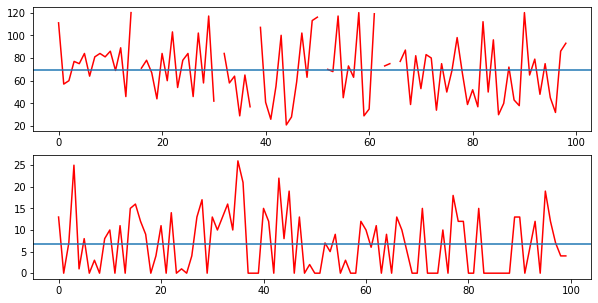

In [109]:
plt.figure(figsize=(10,5))
mean_in = test['Income'].mean()
mean_ad = test['Advertising'].mean()
mean_p = test['Population'].mean()
mean_pr = test['Price'].mean()
mean_ag = test['Age'].mean()

plt.subplot(2,1,1)
plt.plot(test['Income'],'r')
plt.axhline(mean_in)

plt.subplot(2,1,2)
plt.plot(test['Advertising'],'r')
plt.axhline(mean_ad)


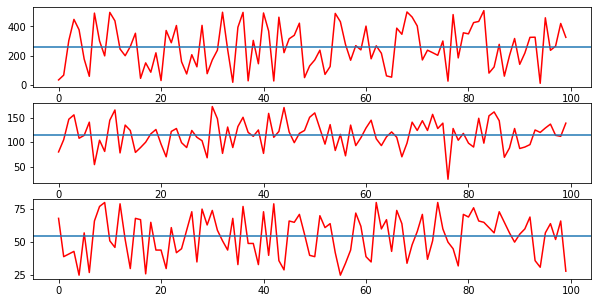

In [110]:
plt.figure(figsize=(10,5))
mean_in = test['Income'].mean()
mean_ad = test['Advertising'].mean()
mean_p = test['Population'].mean()
mean_pr = test['Price'].mean()
mean_ag = test['Age'].mean()


plt.subplot(3,1,1)
plt.plot(test['Population'],'r')
plt.axhline(mean_p)

plt.subplot(3,1,2)
plt.plot(test['Price'],'r')
plt.axhline(mean_pr)

plt.subplot(3,1,3)
plt.plot(test['Age'],'r')
plt.axhline(mean_ag)